In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install gridstatus

In [3]:
import gridstatus

In [4]:
gridstatus.list_isos()

Name     Id  Class
0                       Midcontinent ISO   miso   MISO
1                         California ISO  caiso  CAISO
2                                    PJM    pjm    PJM
3  Electric Reliability Council of Texas  ercot  Ercot
4                   Southwest Power Pool    spp    SPP
5                           New York ISO  nyiso  NYISO
6                        ISO New England  isone  ISONE

In [5]:
caiso = gridstatus.CAISO()

Historical fuel mix dataset.

In [6]:
start = pd.Timestamp('Jan 1, 2021').normalize()
end = pd.Timestamp('Jan 1, 2023').normalize()
fuel_mix_df = caiso.get_fuel_mix(start=start, end=end)

100%|█████████████████████████████████████████| 730/730 [01:55<00:00,  6.32it/s]


In [7]:
fuel_mix_df.to_csv('raw_fuel_mix.csv', index=False)

In [8]:
fuel_mix_df

Time            Interval Start  \
0      2021-01-01 00:00:00-08:00 2021-01-01 00:00:00-08:00   
1      2021-01-01 00:05:00-08:00 2021-01-01 00:05:00-08:00   
2      2021-01-01 00:10:00-08:00 2021-01-01 00:10:00-08:00   
3      2021-01-01 00:15:00-08:00 2021-01-01 00:15:00-08:00   
4      2021-01-01 00:20:00-08:00 2021-01-01 00:20:00-08:00   
...                          ...                       ...   
210195 2022-12-31 23:35:00-08:00 2022-12-31 23:35:00-08:00   
210196 2022-12-31 23:40:00-08:00 2022-12-31 23:40:00-08:00   
210197 2022-12-31 23:45:00-08:00 2022-12-31 23:45:00-08:00   
210198 2022-12-31 23:50:00-08:00 2022-12-31 23:50:00-08:00   
210199 2022-12-31 23:55:00-08:00 2022-12-31 23:55:00-08:00   

                    Interval End  Solar    Wind  Geothermal  Biomass  Biogas  \
0      2021-01-01 00:05:00-08:00  -41.0  1424.0       958.0    309.0   199.0   
1      2021-01-01 00:10:00-08:00  -41.0  1449.0       959.0    309.0   201.0   
2      2021-01-01 00:15:00-08:00  -41.0  1430.0       958.0    310.0   202.0   
3      2021-01-01 00:20:00-08:00  -41.0  1430.0       958.0    308.0   202.0   
4      2021-01-01 00:25:00-08:00  -41.0  1435.0       957.0    309.0   203.0   
...                          ...    ...     ...         ...      ...     ...   
210195 2022-12-31 23:40:00-08:00  -37.0  2833.0       902.0    286.0   211.0   
210196 2022-12-31 23:45:00-08:00  -37.0  2850.0       902.0    285.0   212.0   
210197 2022-12-31 23:50:00-08:00  -37.0  2889.0       903.0    286.0   211.0   
210198 2022-12-31 23:55:00-08:00  -37.0  2958.0       903.0    286.0   211.0   
210199 2023-01-01 00:00:00-08:00  -38.0  3060.0       904.0    286.0   211.0   

        Small Hydro  Coal  Nuclear  Natural Gas  Large Hydro  Batteries  \
0             144.0  13.0   1144.0       8069.0        690.0      -46.0   
1             143.0  13.0   1145.0       8084.0        698.0      -20.0   
2             142.0  13.0   1145.0       8077.0        702.0       22.0   
3             142.0  13.0   1145.0       8050.0        701.0       46.0   
4             142.0  13.0   1144.0       8008.0        701.0       36.0   
...             ...   ...      ...          ...          ...        ...   
210195        201.0   3.0   2245.0       8513.0       1352.0      302.0   
210196        201.0   3.0   2244.0       8431.0       1355.0      288.0   
210197        201.0   4.0   2245.0       8462.0       1353.0      236.0   
210198        201.0   3.0   2245.0       8461.0       1353.0      187.0   
210199        201.0   4.0   2244.0       8332.0       1374.0      122.0   

        Imports  Other  
0        9541.0    0.0  
1        9388.0    0.0  
2        9314.0    0.0  
3        9247.0    0.0  
4        9200.0    0.0  
...         ...    ...  
210195   6547.0    0.0  
210196   6501.0    0.0  
210197   6448.0    0.0  
210198   6441.0    0.0  
210199   6413.0    0.0  

[210200 rows x 16 columns]

In [9]:
fuel_mix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210200 entries, 0 to 210199
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype                     
---  ------          --------------   -----                     
 0   Time            210200 non-null  datetime64[ns, US/Pacific]
 1   Interval Start  210200 non-null  datetime64[ns, US/Pacific]
 2   Interval End    210200 non-null  datetime64[ns, US/Pacific]
 3   Solar           210200 non-null  float64                   
 4   Wind            210200 non-null  float64                   
 5   Geothermal      210200 non-null  float64                   
 6   Biomass         210200 non-null  float64                   
 7   Biogas          210200 non-null  float64                   
 8   Small Hydro     210200 non-null  float64                   
 9   Coal            210200 non-null  float64                   
 10  Nuclear         210200 non-null  float64                   
 11  Natural Gas     210200 non-null  float6

In [10]:
fuel_mix_df.describe()

Solar           Wind     Geothermal        Biomass  \
count  210200.000000  210200.000000  210200.000000  210200.000000   
mean     4108.182307    2384.372341     889.126299     292.975186   
std      4955.134014    1405.788246      75.897783      43.651086   
min      -180.000000     -18.000000    -134.000000    -278.000000   
25%       -36.000000    1183.000000     851.000000     263.000000   
50%       159.000000    2142.000000     894.000000     296.000000   
75%      9272.000000    3531.000000     928.000000     326.000000   
max     14288.000000   36275.000000    1134.000000     440.000000   

              Biogas    Small Hydro           Coal        Nuclear  \
count  210200.000000  210200.000000  210200.000000  210200.000000   
mean      205.211470     180.328506      12.218554    1954.744933   
std        14.668177      75.671698       6.394674     488.984959   
min       132.000000      46.000000      -8.000000     446.000000   
25%       198.000000     141.000000       7.000000    1379.000000   
50%       208.000000     178.000000      14.000000    2259.000000   
75%       214.000000     213.000000      17.000000    2267.000000   
max       246.000000    3316.000000      91.000000    2287.000000   

         Natural Gas    Large Hydro      Batteries        Imports  \
count  210200.000000  210200.000000  210200.000000  210200.000000   
mean     9241.871484    1313.294115      53.837726    5401.127117   
std      4066.788360     883.757074     561.457075    2889.627312   
min      1494.000000    -595.000000   -2333.000000   -4459.000000   
25%      6226.000000     703.000000    -179.000000    3265.000000   
50%      8769.000000    1136.000000      -6.000000    5846.000000   
75%     11598.000000    1790.000000     217.000000    7734.000000   
max     26697.000000    5342.000000    3359.000000   11587.000000   

               Other  
count  210200.000000  
mean        0.005333  
std         0.103070  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         2.000000

In [11]:
fuel_mix_df_cols = fuel_mix_df.columns
fuel_mix_df_source_cols = fuel_mix_df_cols[3:]

Histogram.

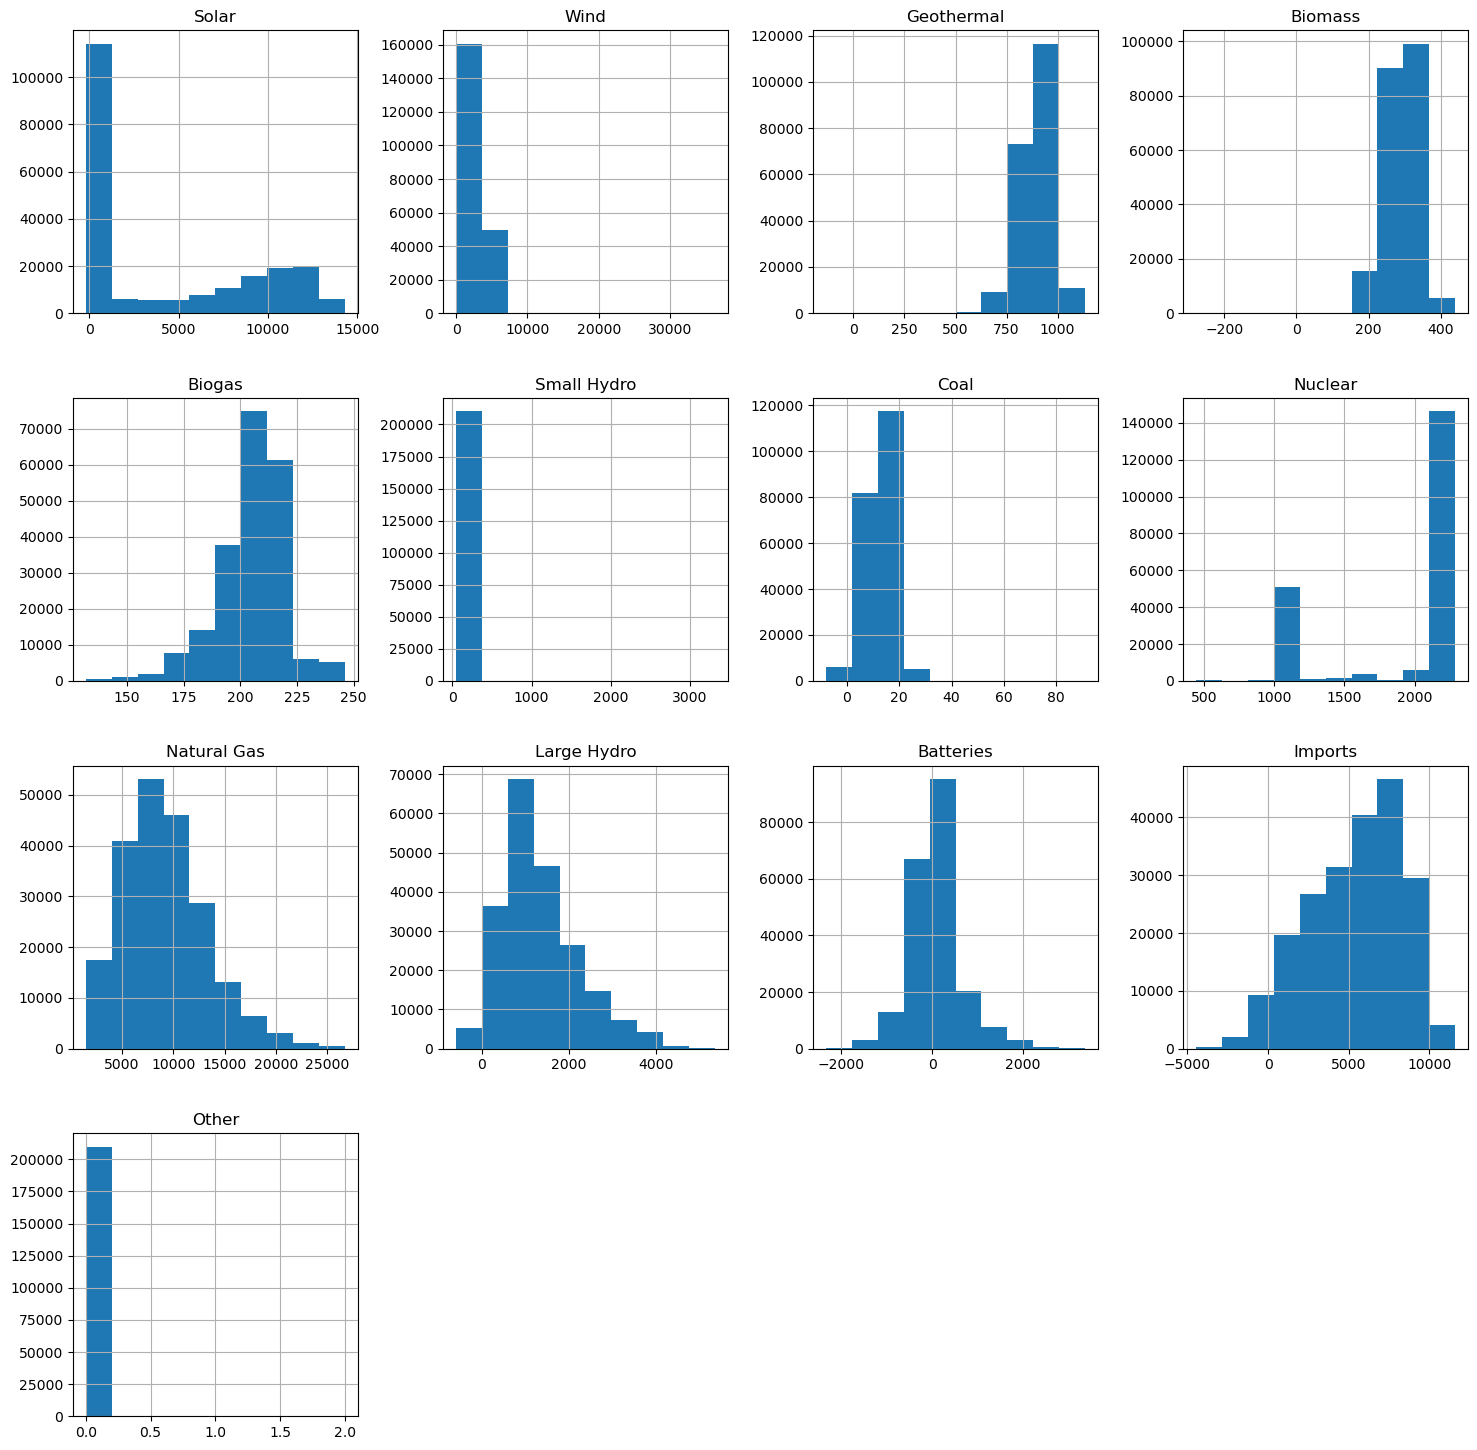

In [12]:
fuel_mix_df[fuel_mix_df_source_cols].hist(figsize=(18,18))
plt.show()

Correlation matrix.

In [13]:
fuel_mix_df_corr = fuel_mix_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(fuel_mix_df_corr)
plt.show()

Pairwise relationship.

In [14]:
# pairwise relationship between time and each source
sns.pairplot(fuel_mix_df, x_vars=[fuel_mix_df_cols[0]], y_vars=fuel_mix_df_cols[3:-1], height=4, aspect=3)
plt.show()

Gas prices dataset.

In [15]:
start = pd.Timestamp('Jan 1, 2021').normalize()
end = pd.Timestamp('Jan 1, 2023').normalize()
gas_price_df = caiso.get_gas_prices(start=start, end=end, fuel_region_id='FRBANCSMUD')

100%|███████████████████████████████████████████| 24/24 [02:08<00:00,  5.37s/it]


In [16]:
gas_price_df.to_csv('raw_gas_price.csv', index=False)

In [17]:
gas_price_df

Time            Interval Start  \
0     2021-01-01 00:00:00-08:00 2021-01-01 00:00:00-08:00   
1     2021-01-01 01:00:00-08:00 2021-01-01 01:00:00-08:00   
2     2021-01-01 02:00:00-08:00 2021-01-01 02:00:00-08:00   
3     2021-01-01 03:00:00-08:00 2021-01-01 03:00:00-08:00   
4     2021-01-01 04:00:00-08:00 2021-01-01 04:00:00-08:00   
...                         ...                       ...   
17515 2022-12-31 19:00:00-08:00 2022-12-31 19:00:00-08:00   
17516 2022-12-31 20:00:00-08:00 2022-12-31 20:00:00-08:00   
17517 2022-12-31 21:00:00-08:00 2022-12-31 21:00:00-08:00   
17518 2022-12-31 22:00:00-08:00 2022-12-31 22:00:00-08:00   
17519 2022-12-31 23:00:00-08:00 2022-12-31 23:00:00-08:00   

                   Interval End Fuel Region Id  Price  
0     2021-01-01 01:00:00-08:00     FRBANCSMUD   3.63  
1     2021-01-01 02:00:00-08:00     FRBANCSMUD   3.63  
2     2021-01-01 03:00:00-08:00     FRBANCSMUD   3.63  
3     2021-01-01 04:00:00-08:00     FRBANCSMUD   3.63  
4     2021-01-01 05:00:00-08:00     FRBANCSMUD   3.63  
...                         ...            ...    ...  
17515 2022-12-31 20:00:00-08:00     FRBANCSMUD  15.79  
17516 2022-12-31 21:00:00-08:00     FRBANCSMUD  15.79  
17517 2022-12-31 22:00:00-08:00     FRBANCSMUD  15.79  
17518 2022-12-31 23:00:00-08:00     FRBANCSMUD  15.79  
17519 2023-01-01 00:00:00-08:00     FRBANCSMUD  15.79  

[17520 rows x 5 columns]

In [18]:
gas_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype                     
---  ------          --------------  -----                     
 0   Time            17520 non-null  datetime64[ns, US/Pacific]
 1   Interval Start  17520 non-null  datetime64[ns, US/Pacific]
 2   Interval End    17520 non-null  datetime64[ns, US/Pacific]
 3   Fuel Region Id  17520 non-null  object                    
 4   Price           17520 non-null  float64                   
dtypes: datetime64[ns, US/Pacific](3), float64(1), object(1)
memory usage: 684.5+ KB


In [19]:
gas_price_df.describe()

Price
count  17520.000000
mean       7.598187
std        5.905079
min        3.440000
25%        4.910000
50%        6.360000
75%        8.390000
max       57.230000

In [20]:
gas_price_df_cols = gas_price_df.columns

Histogram.

In [21]:
gas_price_df['Price'].hist()
plt.show()

Correlation matrix.

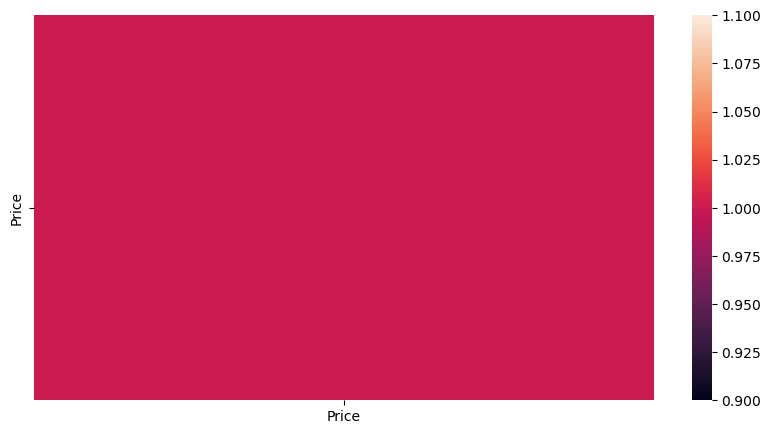

In [22]:
gas_price_df_corr = gas_price_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(gas_price_df_corr)
plt.show()

Pairwise relationship.

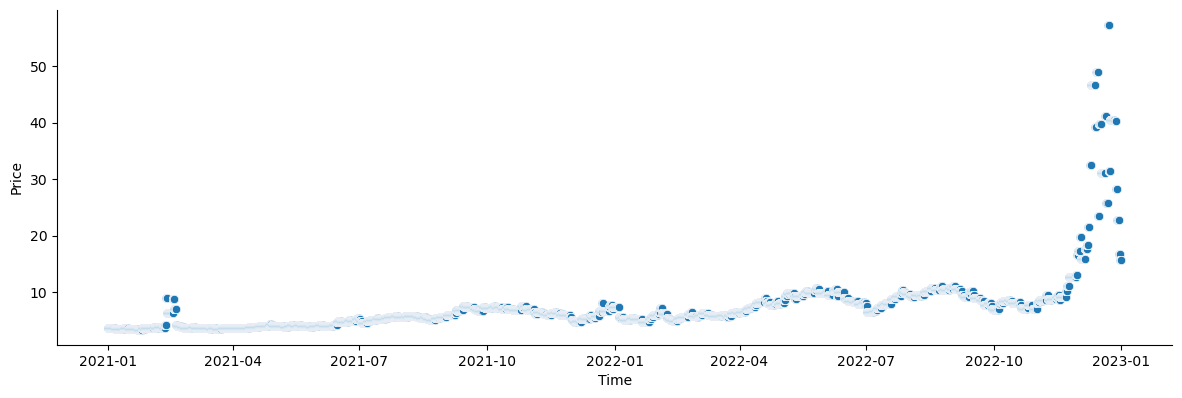

In [23]:
# pairwise relationship between time and price
sns.pairplot(gas_price_df, x_vars=[gas_price_df_cols[0]], y_vars=gas_price_df_cols[-1], height=4, aspect=3)
plt.show()